In [17]:
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install pyarrow

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/f8/8c/9ad173c5cd2c7178c84075c02ec37b5d1d53fb1d015f51ea3e623ea9c31c/pandas-2.1.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached pandas-2.1.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/32/4d/aaf7eff5deb402fd9a24a1449a8119f00d74ae9c2efa79f8ef9994261fc2/pytz-2023.3.post1-py2.py3-none-any.whl.metadata
  Using cached pytz-2023.3.post1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
Using cached pandas-2.1.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.2 MB)
Using cached pytz-2023.3.post1-py2.py3-none-any.whl (502 kB)
  Obtaining dependency information fo

In [18]:
import pandas as pd 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

### Carregando dataset

In [19]:
df = pd.read_csv("./salaries.csv")
df.head(7)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,EN,FT,Data Scientist,100000,USD,100000,US,100,US,M
1,2023,MI,FT,Machine Learning Engineer,45000,EUR,48585,IT,100,GB,M
2,2023,MI,FT,Data Analyst,142000,USD,142000,US,0,US,M
3,2023,MI,FT,Data Analyst,128000,USD,128000,US,0,US,M
4,2023,SE,FT,ETL Developer,99500,USD,99500,US,0,US,M
5,2023,SE,FT,ETL Developer,53300,USD,53300,US,0,US,M
6,2023,SE,FT,Data Engineer,210000,USD,210000,US,0,US,M


In [20]:
df.describe(include="all")

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,7366.000000,7366,7366,7366,7.366000e+03,7366,7366.000000,7366,7366.000000,7366,7366
unique,NaN,4,4,118,NaN,22,NaN,85,NaN,73,3
top,NaN,SE,FT,Data Engineer,NaN,USD,NaN,US,NaN,US,M
freq,NaN,5290,7324,1762,NaN,6640,NaN,6205,NaN,6252,6537
mean,2022.686261,NaN,NaN,NaN,1.782110e+05,NaN,148570.102498,NaN,40.673364,NaN,NaN
std,0.579340,NaN,NaN,NaN,4.945834e+05,NaN,63913.438628,NaN,48.380788,NaN,NaN
min,2020.000000,NaN,NaN,NaN,1.400000e+04,NaN,15000.000000,NaN,0.000000,NaN,NaN
25%,2022.000000,NaN,NaN,NaN,1.052000e+05,NaN,105000.000000,NaN,0.000000,NaN,NaN
50%,2023.000000,NaN,NaN,NaN,1.440000e+05,NaN,142200.000000,NaN,0.000000,NaN,NaN
75%,2023.000000,NaN,NaN,NaN,1.893275e+05,NaN,185900.000000,NaN,100.000000,NaN,NaN


## Análise Salários
### Em relação com o cargo

In [21]:
df_salarios = df[['salary_in_usd', 'job_title', 'employment_type']]
df_salarios.describe(include="all")

,salary_in_usd,job_title,employment_type
count,7366.000000,7366,7366
unique,NaN,118,4
top,NaN,Data Engineer,FT
freq,NaN,1762,7324
mean,148570.102498,NaN,NaN
std,63913.438628,NaN,NaN
min,15000.000000,NaN,NaN
25%,105000.000000,NaN,NaN
50%,142200.000000,NaN,NaN
75%,185900.000000,NaN,NaN


In [22]:
df_salarios_grouped = df_salarios.groupby(['job_title', 'employment_type'], as_index=False).mean()
df_salarios_grouped

,job_title,employment_type,salary_in_usd
0,AI Architect,FT,255193.600000
1,AI Developer,FT,141041.714286
2,AI Engineer,FT,160549.384615
3,AI Programmer,FT,68817.400000
4,AI Research Engineer,FT,70117.000000
...,...,...,...
142,Staff Data Analyst,CT,44753.000000
143,Staff Data Analyst,FT,97499.000000
144,Staff Data Scientist,CT,105000.000000
145,Staff Data Scientist,FT,164000.000000


In [23]:
df_salarios_pivot = df_salarios_grouped.pivot(index='job_title',columns='employment_type')
df_salarios_pivot

salary_in_usd                            
employment_type                            CT       FL             FT  PT
job_title                                                                
AI Architect                              NaN      NaN  255193.600000 NaN
AI Developer                              NaN      NaN  141041.714286 NaN
AI Engineer                               NaN      NaN  160549.384615 NaN
AI Programmer                             NaN      NaN   68817.400000 NaN
AI Research Engineer                      NaN      NaN   70117.000000 NaN
...                                       ...      ...            ...  ..
Sales Data Analyst                    60000.0      NaN            NaN NaN
Software Data Engineer                    NaN  50000.0  142441.500000 NaN
Staff Data Analyst                    44753.0      NaN   97499.000000 NaN
Staff Data Scientist                 105000.0      NaN  164000.000000 NaN
Staff Machine Learning Engineer           NaN      NaN  185000.000000 NaN

[118 rows x 4 columns]

<Axes: xlabel='None-employment_type', ylabel='job_title'>

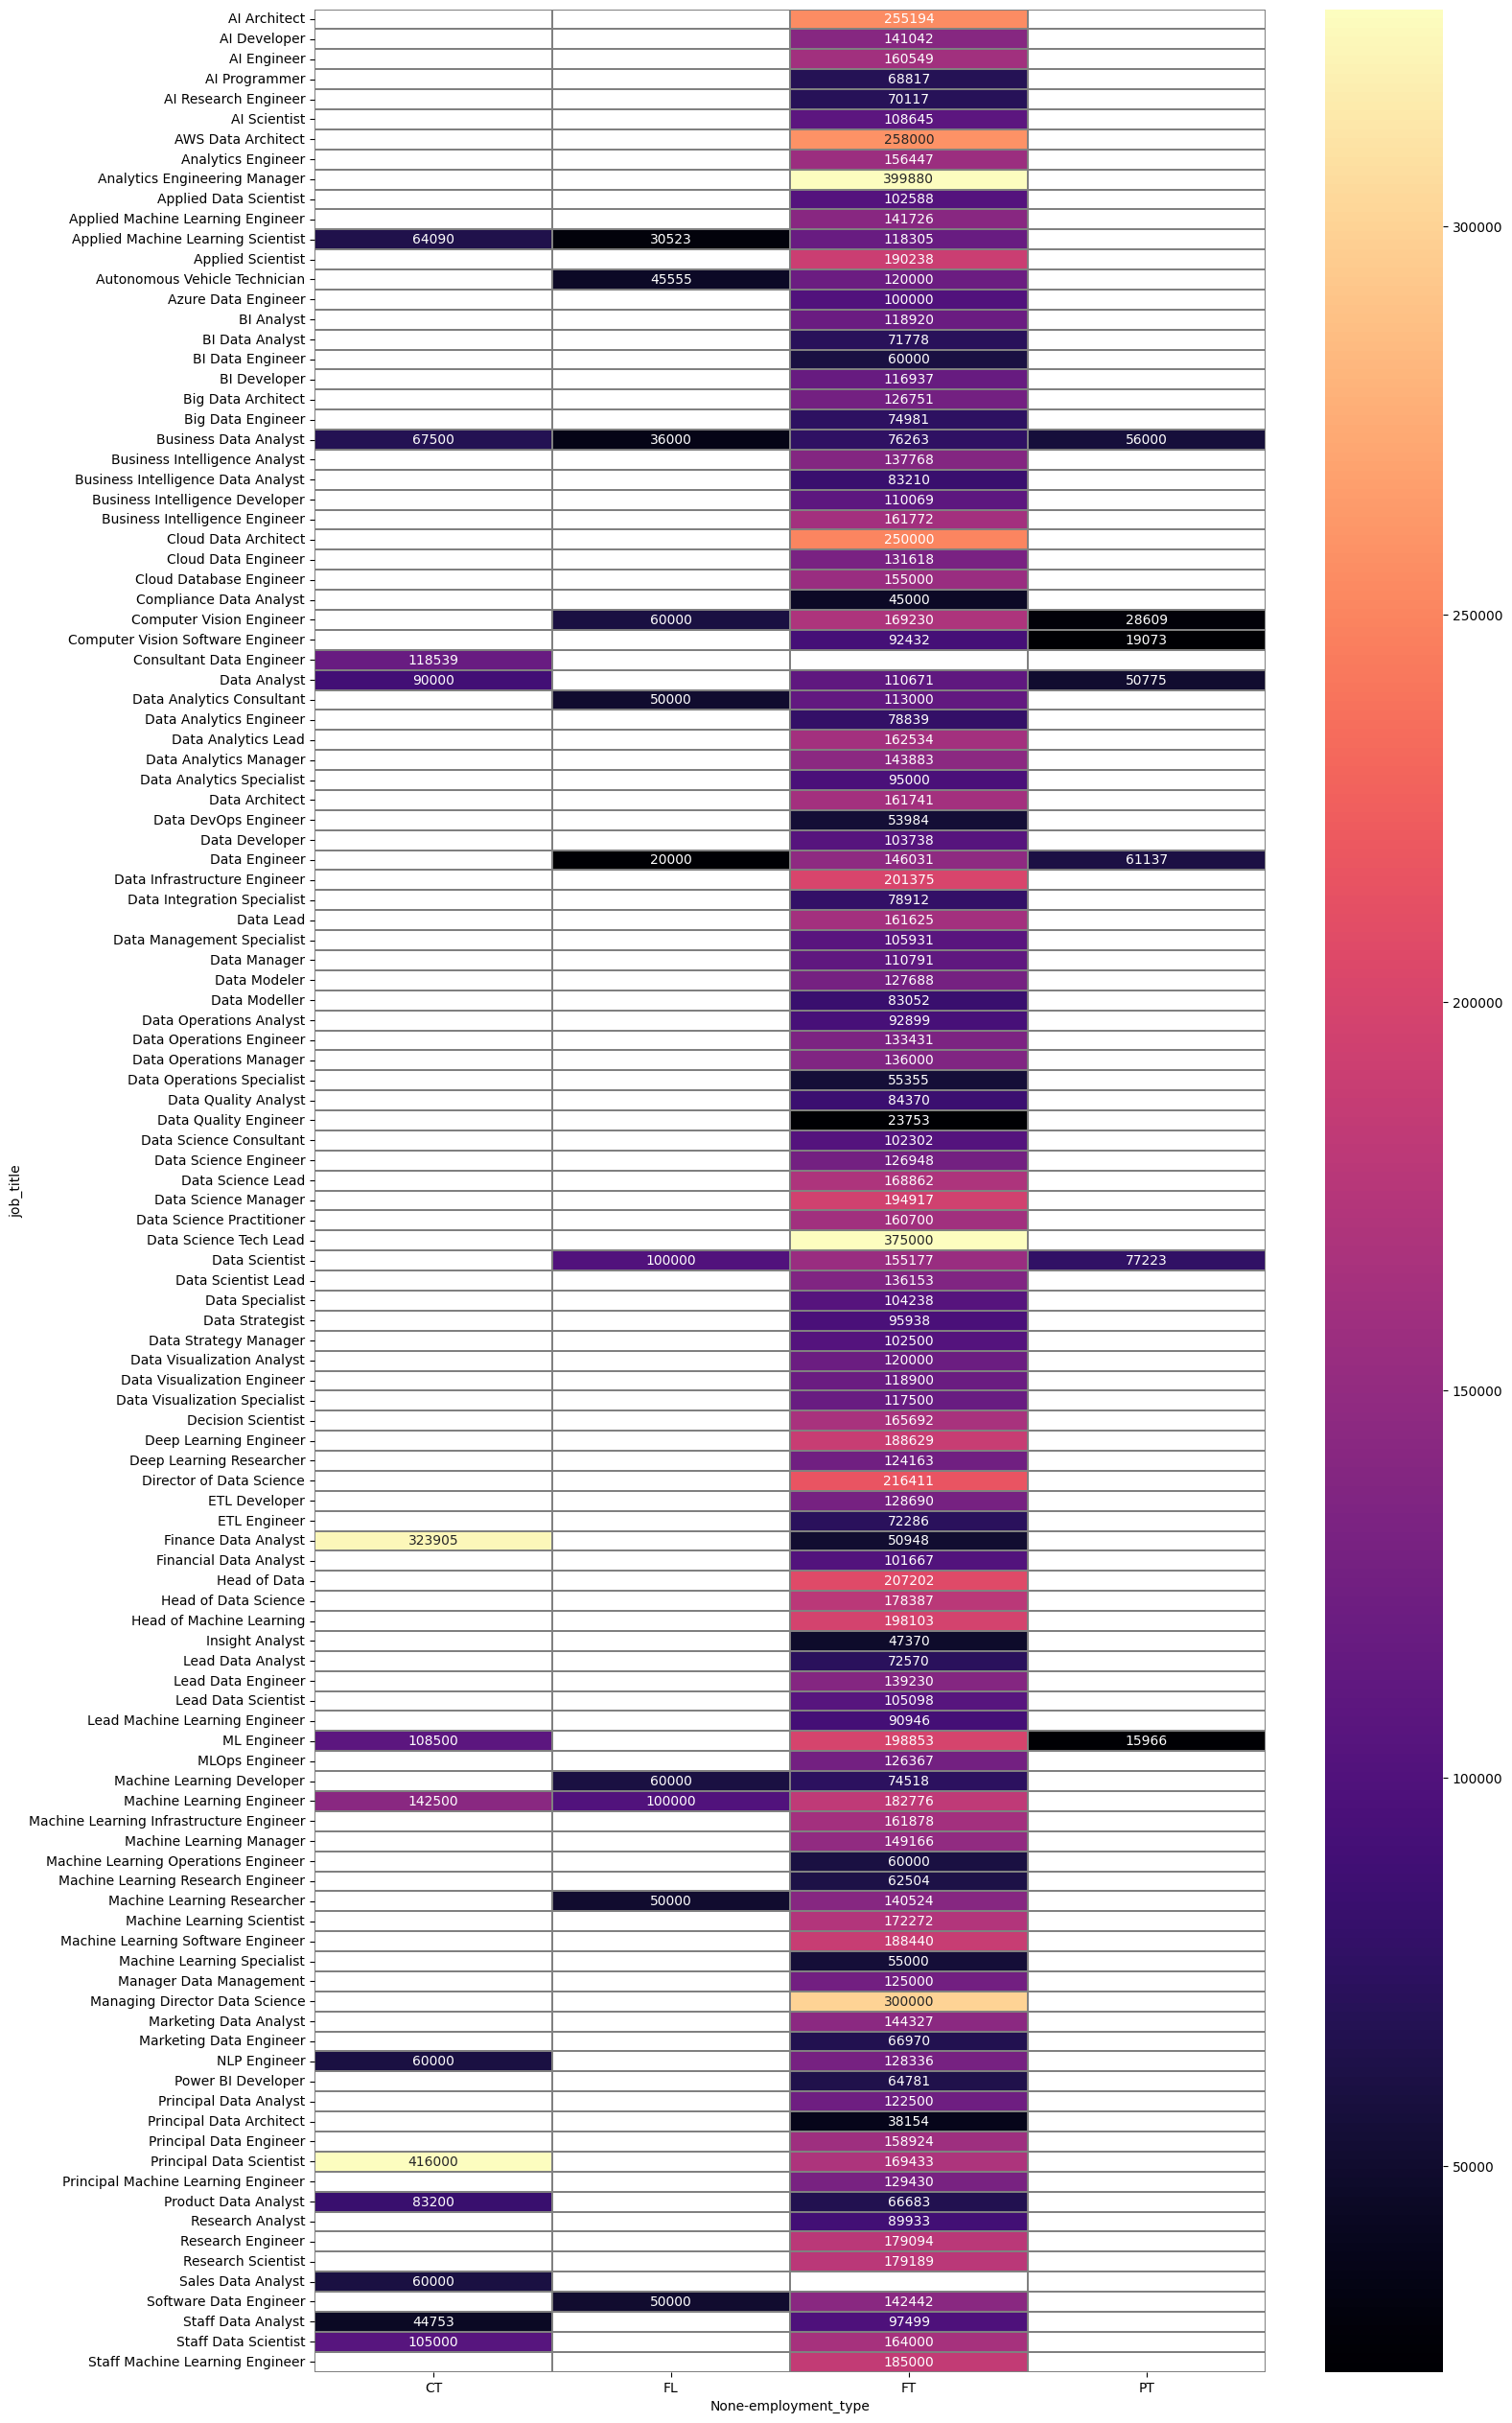

In [24]:
df_salarios_pivot.dropna(inplace=True, how='all')
fig, ax = plt.subplots(figsize=(16,32))
sns.heatmap(df_salarios_pivot, xticklabels=['CT','FL','FT','PT'], robust=True, cmap='magma', annot=True, fmt=".0f", linewidths=0.15, linecolor='gray')

In [25]:
df_salarios_grouped_FT = df_salarios_grouped[df_salarios_grouped['employment_type'] == 'FT']
df_salarios_grouped_FT.set_index('job_title', inplace=True, drop=True)
df_salarios_grouped_FT.drop(inplace=True, columns='employment_type')
df_salarios_grouped_FT.head(10)

/tmp/ipykernel_21938/1547980090.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_salarios_grouped_FT.drop(inplace=True, columns='employment_type')


,salary_in_usd
job_title,
AI Architect,255193.600000
AI Developer,141041.714286
AI Engineer,160549.384615
AI Programmer,68817.400000
AI Research Engineer,70117.000000
AI Scientist,108644.650000
AWS Data Architect,258000.000000
Analytics Engineer,156447.107843
Analytics Engineering Manager,399880.000000


In [26]:
import copy

df_salarios_grouped_FT_Data_Science = copy.deepcopy(df_salarios_grouped_FT)

for data in df_salarios_grouped_FT_Data_Science.index:
    if ("Data Scientist" not in str(data)) and ("Data Science" not in str(data)):
        df_salarios_grouped_FT_Data_Science.drop(index=data, inplace=True)

df_salarios_grouped_FT_Data_Science

,salary_in_usd
job_title,
Applied Data Scientist,102587.916667
Data Science Consultant,102302.382353
Data Science Engineer,126948.000000
Data Science Lead,168861.750000
Data Science Manager,194917.451220
Data Science Practitioner,160700.000000
Data Science Tech Lead,375000.000000
Data Scientist,155177.246114
Data Scientist Lead,136153.000000


In [27]:
import pyarrow
df_salarios_grouped_FT_Data_Science.to_feather("df_salarios_Data_Science.feather")

In [32]:
df_teste = pd.read_feather("./df_salarios_Data_Science.feather")
df_teste

,salary_in_usd
job_title,
Applied Data Scientist,102587.916667
Data Science Consultant,102302.382353
Data Science Engineer,126948.000000
Data Science Lead,168861.750000
Data Science Manager,194917.451220
Data Science Practitioner,160700.000000
Data Science Tech Lead,375000.000000
Data Scientist,155177.246114
Data Scientist Lead,136153.000000


## Análise Salário
### Em relação com o tamanho e país da empresa

In [28]:
df_sal_empresa_pais = df[['salary_in_usd','company_size','company_location']]
df_sal_empresa_pais

,salary_in_usd,company_size,company_location
0,100000,M,US
1,48585,M,GB
2,142000,M,US
3,128000,M,US
4,99500,M,US
...,...,...,...
7361,412000,L,US
7362,151000,L,US
7363,105000,S,US
7364,100000,L,US


In [29]:
df_grouped = df_sal_empresa_pais.groupby(['company_size', 'company_location'], as_index=False).mean()
df_grouped.head(10)

,company_size,company_location,salary_in_usd
0,L,AE,115000.000000
1,L,AR,50000.000000
2,L,AS,50000.000000
3,L,AT,75141.666667
4,L,AU,87307.444444
5,L,BE,84053.000000
6,L,BR,28589.333333
7,L,CA,96580.333333
8,L,CH,93014.750000
9,L,CL,40038.000000


In [30]:
df_pivot = df_grouped.pivot(index='company_location',columns='company_size')
df_pivot

salary_in_usd                              
company_size                  L              M              S
company_location                                             
AD                          NaN            NaN   50745.000000
AE                115000.000000            NaN   92500.000000
AM                          NaN            NaN   50000.000000
AR                 50000.000000   65000.000000            NaN
AS                 50000.000000            NaN   18053.000000
...                         ...            ...            ...
TH                 19806.500000   29301.000000            NaN
TR                 19276.000000   26508.000000   20000.000000
UA                          NaN   84000.000000   50000.000000
US                161599.040909  158598.540202  115082.272727
ZA                 34482.000000            NaN            NaN

[73 rows x 3 columns]

<Axes: xlabel='None-company_size', ylabel='company_location'>

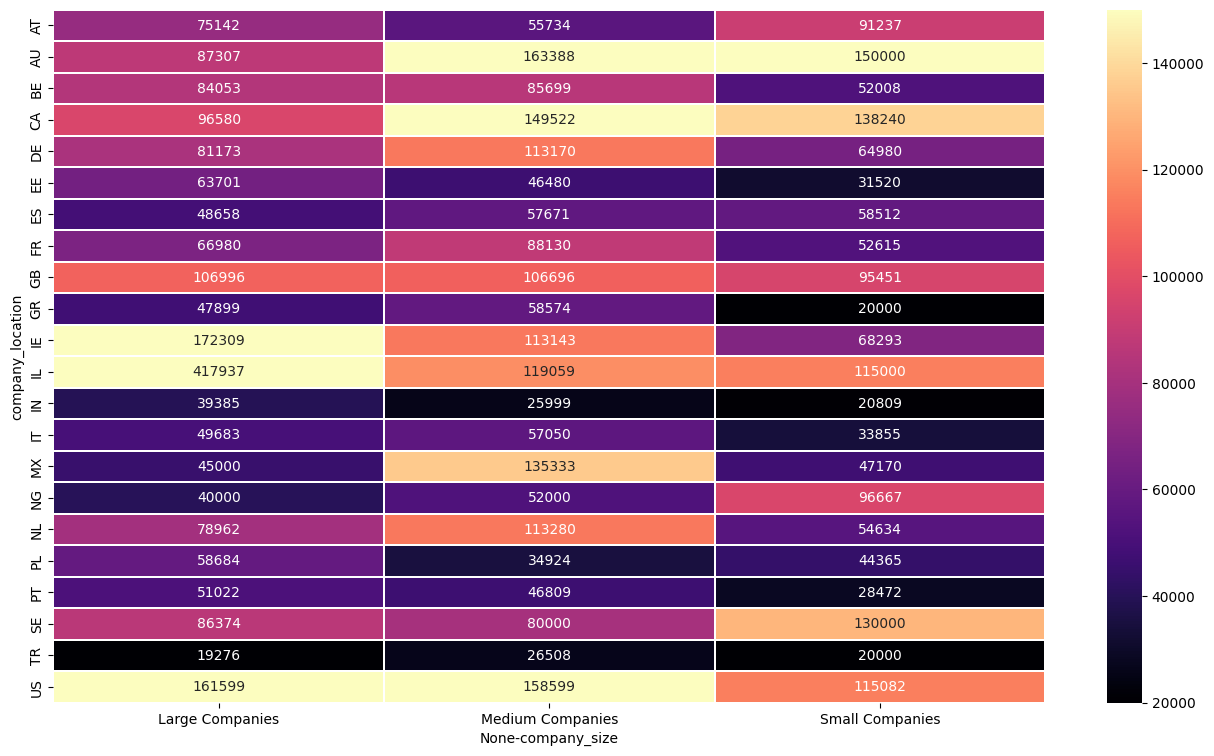

In [31]:
df_pivot.dropna(inplace=True, how='any')
fig, ax = plt.subplots(figsize=(16,9))
sns.heatmap(df_pivot,ax=ax, cmap='magma', annot=True, fmt=".0f",vmin=20000, vmax=150000,linewidths=0.2, xticklabels=['Large Companies','Medium Companies','Small Companies'])